# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/machine_learning_1/polynomial_regression


In [138]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.linear_model import Ridge


## Defining our dataset

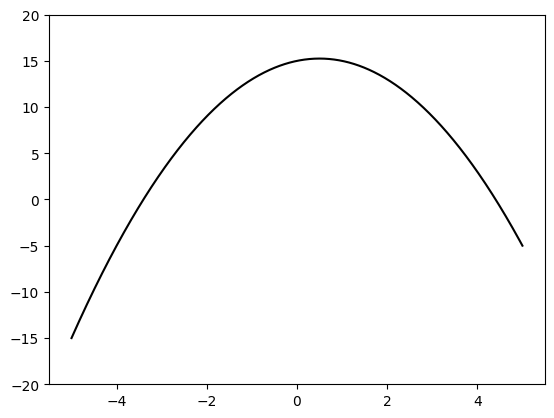

In [72]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [73]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

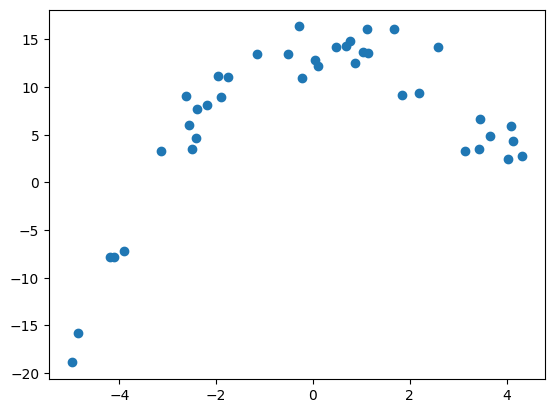

In [74]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [75]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [208]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(degree=polyDegree,include_bias=False)
    X_poly = poly.fit_transform(X.reshape(-1, 1) )
    return X_poly
X_poly=addPoly(X,15)

In [209]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 15)
[3.44421852e+00 1.18626412e+01 4.08575284e+01 1.40722256e+02
 4.84678199e+02 1.66933763e+03 5.74956356e+03 1.98027533e+04
 6.82050095e+04 2.34912956e+05 8.09091554e+05 2.78668811e+06
 9.59796279e+06 3.30574811e+07 1.13857189e+08]


In [210]:
print(X_poly.shape)
print(X.shape)

(40, 15)
(40,)


## Splitting data into training and testing

In [211]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [212]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [213]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data
# normalization trick ;)
model_no_reg = LinearRegression()
model_no_reg.fit(X_train,y_train)

LinearRegression()

Training error (rmse): 1.4576309851159897
Testing error (rmse): 398.88107762326763


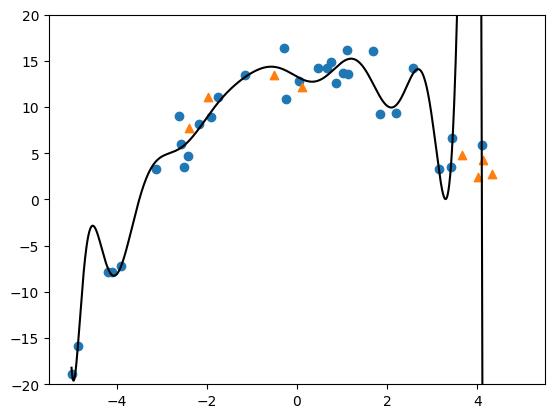

Polynomial coefficients
[13.292877098604434, -2.7088834206233505, 1.321330520327608, 5.874906851407646, 0.3961590911023079, -3.292037333993108, -1.019506849956645, 0.764715753881665, 0.3343573112688581, -0.07407985606464625, -0.04464734007018342, 0.0017168182629080145, 0.002661050241406516, 0.00013802898003713315, -5.831932791591776e-05, -6.0657434286515155e-06]


In [214]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [223]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
# normalization trick ;)
model_L1_reg = Lasso(1000)
model_L1_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+02, tolerance: 2.610e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1000)

Training error (rmse): 3.221676211288148
Testing error (rmse): 5.171006754521848


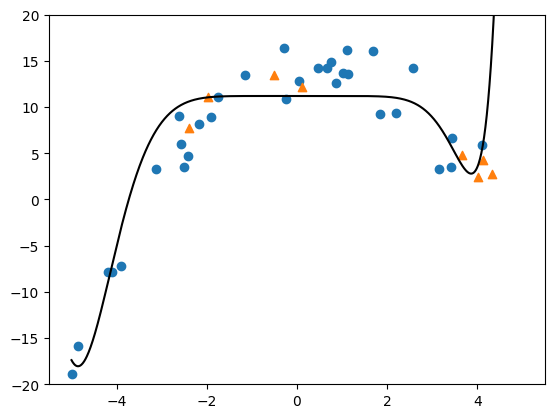

Polynomial coefficients
[11.19984167066363, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.00044282530583323384, -0.0005411095380758053, -4.596192225604037e-05, 1.122125737767321e-05, 3.963155073744176e-07, 4.578360757464089e-07, 6.370889540675742e-08, 1.5101346315742882e-08, 2.909805569856968e-09]


In [224]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [225]:
from sklearn import linear_model
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
# normalization trick ;)

# Transform the testing data using the scaler fitted on the training data
model_L2_reg = linear_model.Ridge(alpha=10)
model_L2_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.85732e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

Training error (rmse): 1.578033745265067
Testing error (rmse): 206.70955632733632


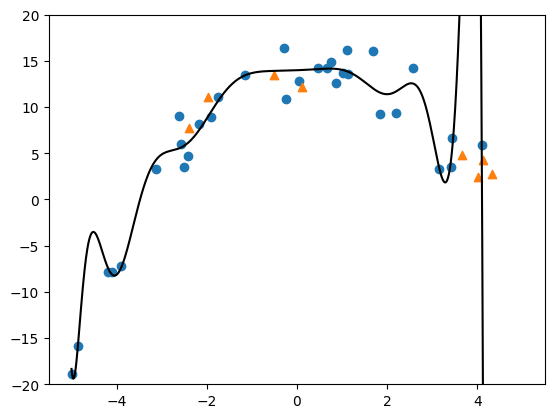

Polynomial coefficients
[13.989408011668159, 0.18794375130133487, 0.16141734028408464, 0.10590683222038953, -0.03411704449411762, -0.19456014586061118, -0.3829766538392641, 0.08168070370363564, 0.14275142680675737, -0.006835247834880764, -0.02021362484659023, -0.0006877037112816177, 0.001248391312613673, 0.00010760929240268444, -2.8011876038305303e-05, -3.408211780612014e-06]


In [226]:
display_results(model_L2_reg)

Training error (rmse): 9.388371605245381e+44
Testing error (rmse): 3.802008218037582e+42


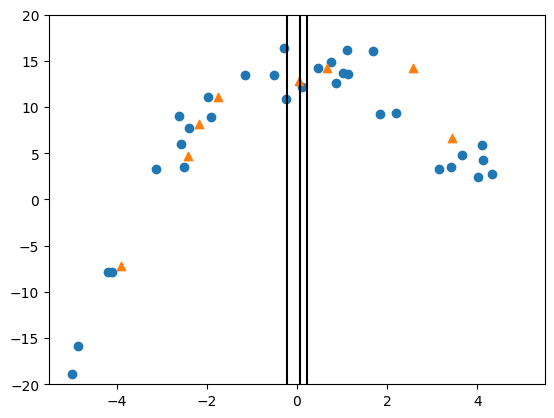

Polynomial coefficients
[array([6.96060478e+11]), -11172439121190.344, 10198929842176.262, -56146014691999.5, 48143034056273.16, -136594752337982.28, -357018199203141.4, 5756822608612887.0, -2.1718055207660504e+16, 2.0972523690934214e+17, -6.648221651907194e+17, 5.513160522939393e+18, -1.7753944701370698e+19, 1.321593799174658e+20, -4.471045313071178e+20, 3.049793732368336e+21, -1.0862054995090685e+22, 6.899860875169373e+22, -2.570150871149608e+23, 1.540963496863973e+24, -5.952371097774271e+24, 3.405230226561093e+25, -1.3527656529611159e+26, 7.446891423309415e+26, -3.019722090884795e+27, 1.609765476414325e+28]


In [195]:

model_L3_reg = SGDRegressor(penalty="l1",alpha=5,learning_rate='constant', eta0=0.1,max_iter=1000)
model_L3_reg.fit(X_train,y_train)

display_results(model_L3_reg)

## Viewing the predictions in the testing set

In [196]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-1.747956,11.091072,12.597013,11.741749,12.360779
1,-2.181622,8.160123,7.311507,9.878501,7.285300
2,-2.410832,4.690236,5.149409,8.483933,5.343291
3,-3.909422,-7.163796,-202.597556,-5.753464,-172.496800
4,0.675107,14.272553,13.751518,13.294631,13.779153
5,3.444219,6.685961,3.946721,3.503395,3.967727
6,0.046869,12.858476,13.752186,13.312393,13.778973
7,2.576039,14.181084,6.373240,8.462584,6.399352


### Real Example (Predict fuel efficiency)

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [199]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [200]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### normal linear regression

In [202]:
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


#### using 50th order

In [203]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [205]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

94.67301043216226


##### lasso regularization

In [207]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.730447503028277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.200e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


##### ridge regularization

In [ ]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01,normalize=True)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.7867550327271036


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
